# Telecom Segmentation Case Study

**Importing the packages:**

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

import scipy.stats as stats

# import packages for clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

import sklearn.cluster as cluster

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
print( dir(cluster))

['AffinityPropagation', 'AgglomerativeClustering', 'Birch', 'BisectingKMeans', 'DBSCAN', 'FeatureAgglomeration', 'KMeans', 'MeanShift', 'MiniBatchKMeans', 'OPTICS', 'SpectralBiclustering', 'SpectralClustering', 'SpectralCoclustering', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_affinity_propagation', '_agglomerative', '_bicluster', '_birch', '_bisect_k_means', '_dbscan', '_dbscan_inner', '_feature_agglomeration', '_hierarchical_fast', '_k_means_common', '_k_means_elkan', '_k_means_lloyd', '_k_means_minibatch', '_kmeans', '_mean_shift', '_optics', '_spectral', 'affinity_propagation', 'cluster_optics_dbscan', 'cluster_optics_xi', 'compute_optics_graph', 'dbscan', 'estimate_bandwidth', 'get_bin_seeds', 'k_means', 'kmeans_plusplus', 'linkage_tree', 'mean_shift', 'spectral_clustering', 'ward_tree']


In [93]:
pd.set_option('display.max_columns', None)

# Import the dataset

In [94]:
telco = pd.read_csv('telco_csv.csv')

In [95]:
telco.shape

(1000, 30)

In [96]:
telco.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1
1,3,11,33,1,7,136,5,5,0,0,6,1,0,1,1,0,1,1,0,1,1,1,1,4.40,20.75,0.0,15.25,35.7,0,4
2,3,68,52,1,24,116,1,29,0,1,2,1,0,1,0,0,0,0,0,1,1,0,1,18.15,18.00,0.0,30.25,0.0,0,3
3,2,33,33,0,12,33,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1
4,2,23,30,1,9,30,1,2,0,0,4,0,0,0,0,0,0,0,0,1,0,1,1,6.30,0.00,0.0,0.00,0.0,0,3


In [97]:
#checking the null values in the dataset.
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1000 non-null   int64  
 1   tenure    1000 non-null   int64  
 2   age       1000 non-null   int64  
 3   marital   1000 non-null   int64  
 4   address   1000 non-null   int64  
 5   income    1000 non-null   int64  
 6   ed        1000 non-null   int64  
 7   employ    1000 non-null   int64  
 8   retire    1000 non-null   int64  
 9   gender    1000 non-null   int64  
 10  reside    1000 non-null   int64  
 11  tollfree  1000 non-null   int64  
 12  equip     1000 non-null   int64  
 13  callcard  1000 non-null   int64  
 14  wireless  1000 non-null   int64  
 15  multline  1000 non-null   int64  
 16  voice     1000 non-null   int64  
 17  pager     1000 non-null   int64  
 18  internet  1000 non-null   int64  
 19  callid    1000 non-null   int64  
 20  callwait  1000 non-null   int64

In [98]:
telco.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'multline', 'voice', 'pager', 'internet', 'callid',
       'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon',
       'cardmon', 'wiremon', 'ebill', 'custcat'],
      dtype='object')

In [99]:
telco.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,0.474000,0.386000,0.678000,0.296000,0.475000,0.304000,0.2610,0.368000,0.481000,0.485000,0.493000,0.502000,11.723100,13.274000,14.219800,13.781000,11.583900,0.371000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,0.499573,0.487074,0.467477,0.456719,0.499624,0.460213,0.4394,0.482503,0.499889,0.500025,0.500201,0.500246,10.363486,16.902122,19.068539,14.084496,19.719426,0.483314,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,8.525000,0.000000,0.000000,12.000000,0.000000,0.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,14.412500,24.250000,31.475000,20.500000,24.712500,1.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,99.950000,173.000000,77.700000,109.250000,111.950000,1.000000,4.000000


In [100]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['Count', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [101]:
telco_summary = telco.apply(continuous_var_summary)
telco_summary

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
Count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
SUM,2022.000000,35526.000000,41684.000000,495.000000,11551.000000,77535.000000,2671.000000,10987.000000,47.000000,517.000000,2331.000000,474.000000,386.000000,678.000000,296.000000,475.000000,304.000000,261.000000,368.000000,481.000000,485.000000,493.000000,502.000000,11723.100000,13274.000000,14219.800000,13781.000000,11583.900000,371.000000,2487.000000
MEAN,2.022000,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,0.474000,0.386000,0.678000,0.296000,0.475000,0.304000,0.261000,0.368000,0.481000,0.485000,0.493000,0.502000,11.723100,13.274000,14.219800,13.781000,11.583900,0.371000,2.487000
MEDIAN,2.000000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.525000,0.000000,0.000000,12.000000,0.000000,0.000000,3.000000
STD,0.816200,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,0.499573,0.487074,0.467477,0.456719,0.499624,0.460213,0.439400,0.482503,0.499889,0.500025,0.500201,0.500246,10.363486,16.902122,19.068539,14.084496,19.719426,0.483314,1.120306
VAR,0.666182,456.241566,157.723868,0.250225,101.741140,11458.453228,1.494253,101.648479,0.044836,0.249961,2.061501,0.249574,0.237241,0.218535,0.208593,0.249625,0.211796,0.193072,0.232809,0.249889,0.250025,0.250201,0.250246,107.401848,285.681731,363.609172,198.373037,388.855747,0.233593,1.255086
MIN,1.000000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
P1,1.000000,1.000000,20.000000,0.000000,0.000000,10.990000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.650000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
P5,1.000000,4.000000,23.000000,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.997500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
P10,1.000000,7.000000,26.000000,0.000000,1.000000,21.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.645000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [102]:
telco.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1
1,3,11,33,1,7,136,5,5,0,0,6,1,0,1,1,0,1,1,0,1,1,1,1,4.40,20.75,0.0,15.25,35.7,0,4
2,3,68,52,1,24,116,1,29,0,1,2,1,0,1,0,0,0,0,0,1,1,0,1,18.15,18.00,0.0,30.25,0.0,0,3
3,2,33,33,0,12,33,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1
4,2,23,30,1,9,30,1,2,0,0,4,0,0,0,0,0,0,0,0,1,0,1,1,6.30,0.00,0.0,0.00,0.0,0,3


In [103]:
# checking the duplicate values
telco.isna().sum()/telco.isna().count()

#no duplicate values found

region      0.0
tenure      0.0
age         0.0
marital     0.0
address     0.0
income      0.0
ed          0.0
employ      0.0
retire      0.0
gender      0.0
reside      0.0
tollfree    0.0
equip       0.0
callcard    0.0
wireless    0.0
multline    0.0
voice       0.0
pager       0.0
internet    0.0
callid      0.0
callwait    0.0
forward     0.0
confer      0.0
longmon     0.0
tollmon     0.0
equipmon    0.0
cardmon     0.0
wiremon     0.0
ebill       0.0
custcat     0.0
dtype: float64

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


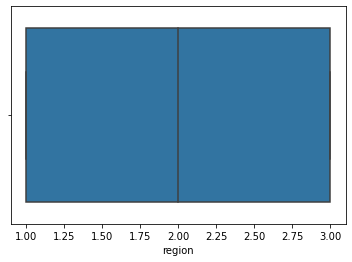

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


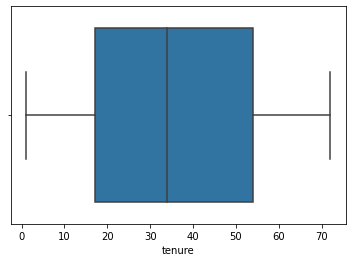

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


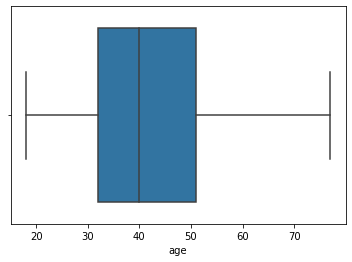

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


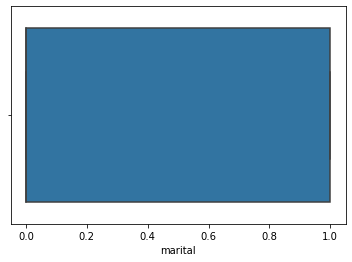

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


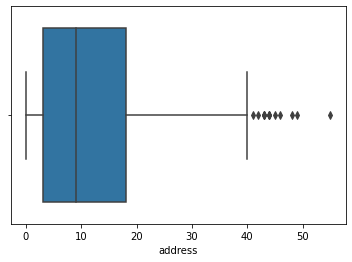

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


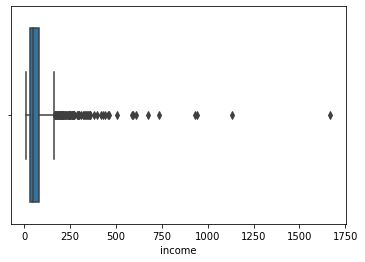

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


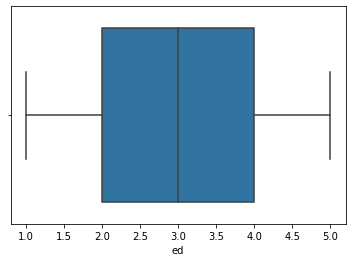

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


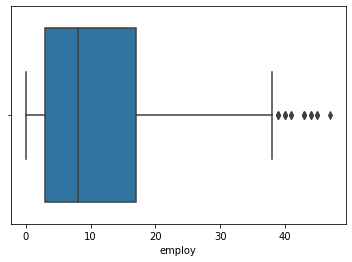

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


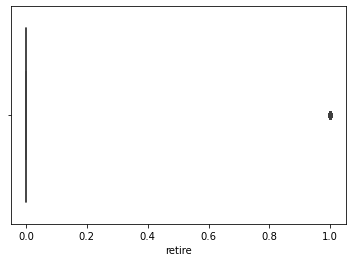

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


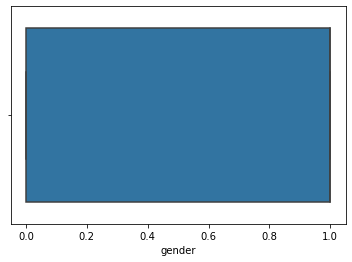

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


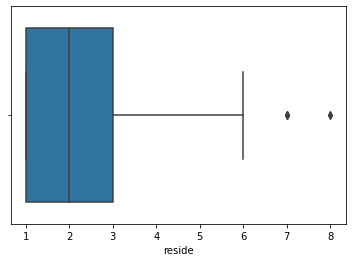

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


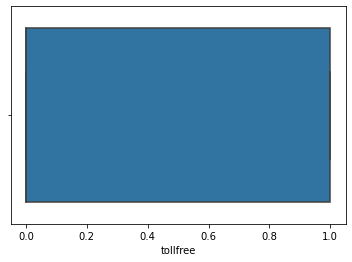

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


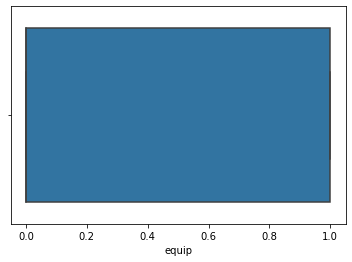

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


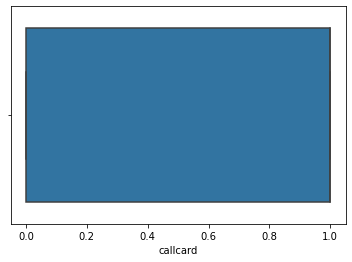

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


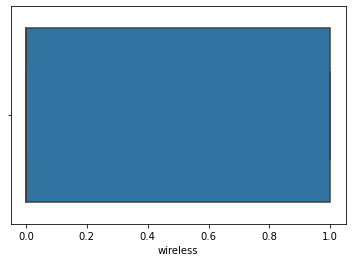

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


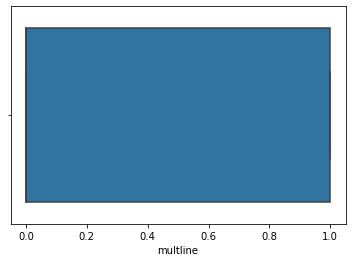

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


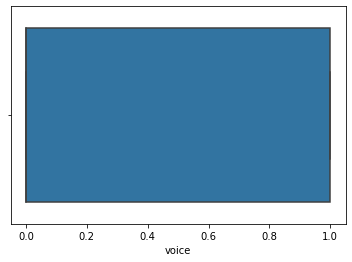

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


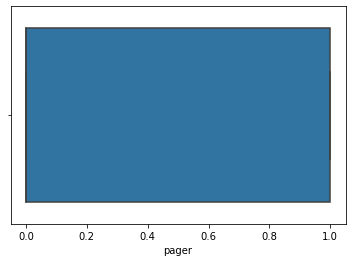

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


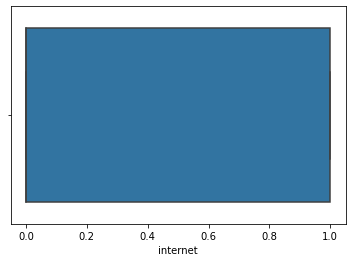

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


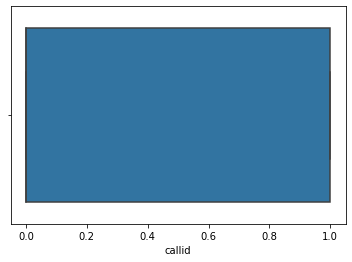

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


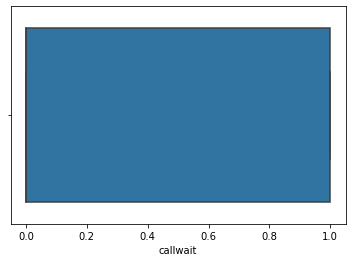

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


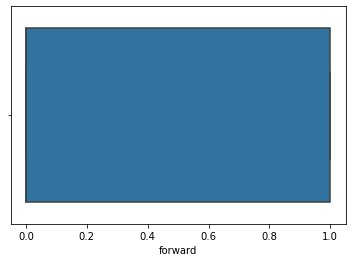

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


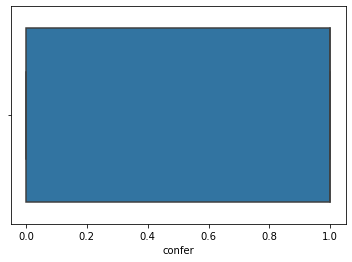

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


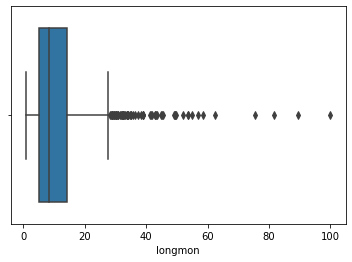

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


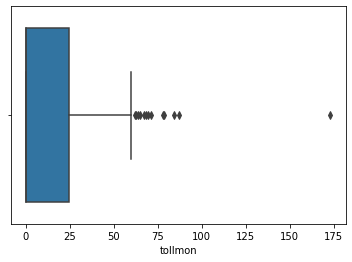

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


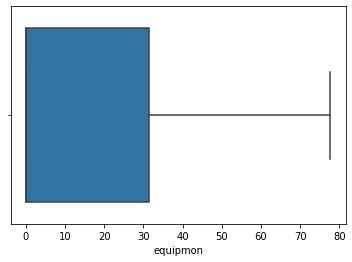

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


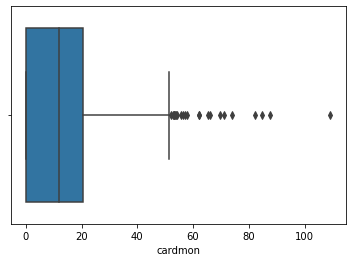

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


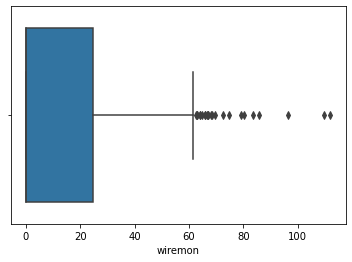

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


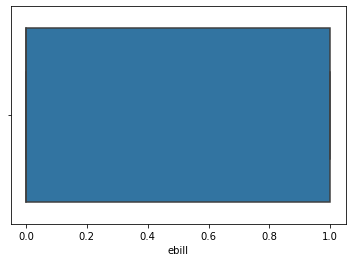

E:\PYTHON SETUP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


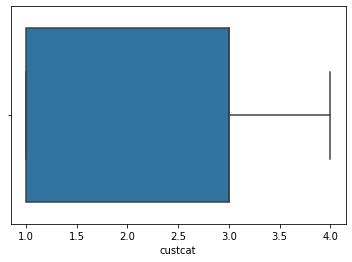

In [14]:
# Checking and Handling the outliers
for col in telco.columns:
    sns.boxplot(telco[col])
    plt.show()

<AxesSubplot:>

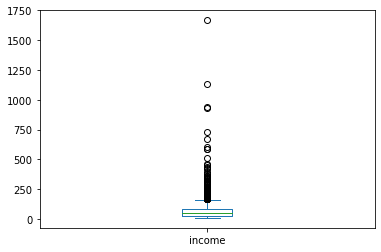

In [15]:
#Check out one of the variables with outliers.
telco.income.plot(kind = 'box')

In [104]:
telco = telco.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

<AxesSubplot:>

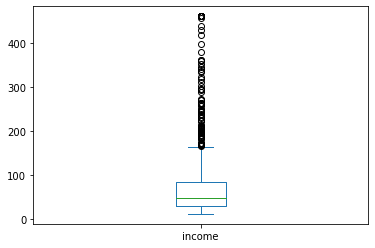

In [105]:
telco.income.plot(kind = 'box')

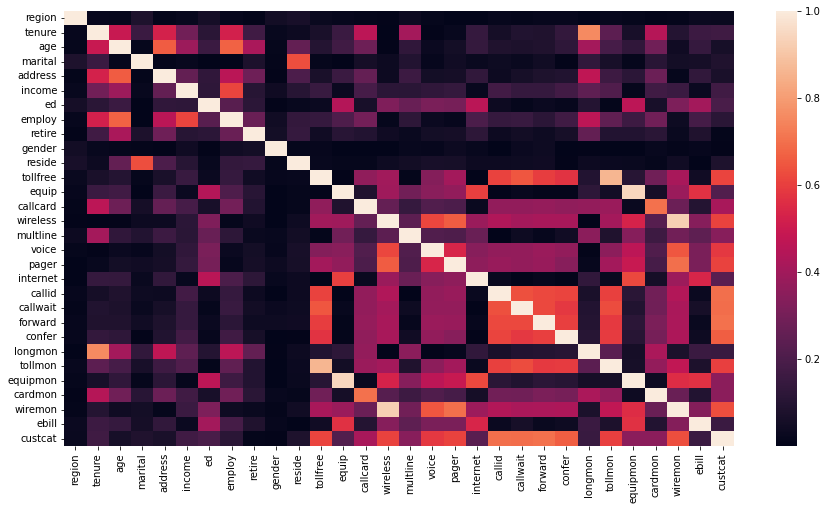

In [106]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (15, 8))
sns.heatmap(telco.corr().abs())
plt.show()

In [19]:
telco.corr().to_excel('telco_corr.xlsx')

In [107]:
telco.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'multline', 'voice', 'pager', 'internet', 'callid',
       'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon',
       'cardmon', 'wiremon', 'ebill', 'custcat'],
      dtype='object')

In [108]:
#checking the variables which shows no variation
list = []
for i in telco.columns:
    if (len(telco[i].unique()) == 1):
        list.append(i)
        print(i, telco[i].unique())
        
print(list)

#empty list: no such variable found

[]


In [111]:
#drop some variables looks numerical nature but they are not numerical (eg: Region, Custcat)
telco.drop( ['ed', 'address', 'marital', 'reside', 'retire', 'gender','region',
                    'custcat', 'employ'], 
               axis = 1, inplace = True)

In [112]:
telco.columns

Index(['tenure', 'age', 'income', 'tollfree', 'equip', 'callcard', 'wireless',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'ebill'],
      dtype='object')

# Checking the Collinearity within the variables.

In [113]:
telco.dtypes

tenure        int64
age         float64
income      float64
tollfree      int64
equip         int64
callcard      int64
wireless      int64
multline      int64
voice         int64
pager         int64
internet      int64
callid        int64
callwait      int64
forward       int64
confer        int64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
ebill         int64
dtype: object

In [121]:
#VIF
#telco_data = telco.copy()
#data_2 = telco_data.drop(columns = ['equipmon','equip'])
#data_3 = data_2.drop(columns = ['wiremon','tenure','wireless','tollfree'])
#data_4 = data_3.drop(columns = ['callcard'])
#data_5 = data_4.drop(columns = ['age'])
#data = pd.Series(variance_inflation_factor(data_5.values,i) for i in range(len(data_5.columns)))
#vif_data = pd.concat([pd.Series(data_5.columns),data], axis = 1)
#vif_data.columns = ['features','VIF']
#vif_data.sort_values(by = 'VIF', ascending = False)

**We will be performing the PCA- Principal Component Analysis through which the selected variable vectors are projected onto the n number of principal component axes.** 

# Standardizing the data to put data on the same scale.

In [23]:
telco.head()

,tenure,age,income,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill
0,13,44.0,64.0,0,0,1,0,0,0,0,0,0,0,1,0,3.70,0.00,0.0,7.50,0.0,0
1,11,33.0,136.0,1,0,1,1,0,1,1,0,1,1,1,1,4.40,20.75,0.0,15.25,35.7,0
2,68,52.0,116.0,1,0,1,0,0,0,0,0,1,1,0,1,18.15,18.00,0.0,30.25,0.0,0
3,33,33.0,33.0,0,0,0,0,0,0,0,0,0,0,0,0,9.45,0.00,0.0,0.00,0.0,0
4,23,30.0,30.0,0,0,0,0,0,0,0,0,1,0,1,1,6.30,0.00,0.0,0.00,0.0,0


In [24]:
# standardize the data
sc = StandardScaler()
telco_scaled = sc.fit_transform(telco)

In [25]:
telco.head()

,tenure,age,income,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill
0,13,44.0,64.0,0,0,1,0,0,0,0,0,0,0,1,0,3.70,0.00,0.0,7.50,0.0,0
1,11,33.0,136.0,1,0,1,1,0,1,1,0,1,1,1,1,4.40,20.75,0.0,15.25,35.7,0
2,68,52.0,116.0,1,0,1,0,0,0,0,0,1,1,0,1,18.15,18.00,0.0,30.25,0.0,0
3,33,33.0,33.0,0,0,0,0,0,0,0,0,0,0,0,0,9.45,0.00,0.0,0.00,0.0,0
4,23,30.0,30.0,0,0,0,0,0,0,0,0,1,0,1,1,6.30,0.00,0.0,0.00,0.0,0


In [26]:
pd.DataFrame(telco_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-1.055125,0.189446,-0.126231,-0.949284,-0.792884,0.689149,-0.648425,-0.95119,-0.660895,-0.594289,-0.763072,-0.962695,-0.970437,1.014099,-1.004008,-0.835868,-0.824695,-0.749071,-0.457615,-0.598794,-0.768001
1,-1.148806,-0.695476,0.802534,1.053425,-0.792884,0.689149,1.542199,-0.95119,1.513101,1.682682,-0.763072,1.038750,1.030464,1.014099,0.996008,-0.761419,0.484856,-0.749071,0.121006,1.275872,-0.768001
2,1.521092,0.833025,0.544543,1.053425,-0.792884,0.689149,-0.648425,-0.95119,-0.660895,-0.594289,-0.763072,1.038750,1.030464,-0.986097,0.996008,0.700982,0.311301,-0.749071,1.240918,-0.598794,-0.768001
3,-0.118319,-0.695476,-0.526115,-0.949284,-0.792884,-1.451065,-0.648425,-0.95119,-0.660895,-0.594289,-0.763072,-0.962695,-0.970437,-0.986097,-1.004008,-0.224319,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001
4,-0.586722,-0.936819,-0.564814,-0.949284,-0.792884,-1.451065,-0.648425,-0.95119,-0.660895,-0.594289,-0.763072,1.038750,-0.970437,1.014099,0.996008,-0.559342,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001


In [27]:
telco_scaled.shape

(1000, 21)

# Dimensionality reduction: applying PCA

In [28]:
pc = PCA( n_components = 21 ).fit( telco_scaled )

In [29]:
pc.explained_variance_   # eigen values

array([6.52134038, 3.9776234 , 2.46936345, 1.04012658, 0.86491769,
       0.79310632, 0.59854502, 0.57141705, 0.55152862, 0.47889598,
       0.45990275, 0.44720761, 0.41966032, 0.3879825 , 0.35893599,
       0.35066293, 0.30365376, 0.21405689, 0.11564558, 0.06920824,
       0.02723996])

In [30]:
# eigen values
sum(pc.explained_variance_)

21.02102102102103

In [31]:
pc.explained_variance_ / sum(pc.explained_variance_)


array([0.31022948, 0.18922123, 0.11747115, 0.04948031, 0.04114537,
       0.0377292 , 0.02847364, 0.02718313, 0.026237  , 0.02278177,
       0.02187823, 0.0212743 , 0.01996384, 0.01845688, 0.0170751 ,
       0.01668154, 0.01444524, 0.01018299, 0.00550143, 0.00329233,
       0.00129584])

In [32]:
# cumulative variance explained
var = np.round( np.cumsum( pc.explained_variance_ratio_) * 100, 2 )
var

array([ 31.02,  49.95,  61.69,  66.64,  70.75,  74.53,  77.38,  80.09,
        82.72,  85.  ,  87.18,  89.31,  91.31,  93.15,  94.86,  96.53,
        97.97,  98.99,  99.54,  99.87, 100.  ])

In [33]:
pd.DataFrame({'Eigen_Values': pc.explained_variance_, 
                  'VAR': np.round(pc.explained_variance_ratio_*100, 2), 
                      'Cumm_VAR': var}, index = range(1, 22))

,Eigen_Values,VAR,Cumm_VAR
1,6.521340,31.02,31.02
2,3.977623,18.92,49.95
3,2.469363,11.75,61.69
4,1.040127,4.95,66.64
5,0.864918,4.11,70.75
6,0.793106,3.77,74.53
7,0.598545,2.85,77.38
8,0.571417,2.72,80.09
9,0.551529,2.62,82.72
10,0.478896,2.28,85.00


**number of components have choosen as 6 based on cumulative variance is explaining > 75 % and individual component explaining > 0.8 variance.**

In [34]:
pc_final = PCA( n_components = 6 ).fit( telco_scaled )

In [35]:
pc_final

PCA(n_components=6)

In [36]:
pc_final.explained_variance_

array([6.52134038, 3.9776234 , 2.46936345, 1.04012656, 0.86480357,
       0.79305753])

In [37]:
reduced_cr = pc_final.transform( telco_scaled )  # the out put is Components (C1, C2, ...)

In [38]:
dimensions = pd.DataFrame(reduced_cr)
dimensions

,0,1,2,3,4,5
0,-2.383811,0.647603,-0.881700,-0.173272,1.348146,0.007101
1,2.823847,0.602267,-2.638560,0.465334,1.454992,-1.610819
2,0.393342,3.238092,0.195578,-0.031097,0.229526,0.926496
3,-3.435344,-0.028501,-0.631408,0.201260,-0.126282,-1.039785
4,-1.890974,0.430331,-2.174680,0.198111,-0.404042,-0.285869
...,...,...,...,...,...,...
995,-2.839204,-2.418030,-0.446267,0.413101,0.079224,0.781536
996,-3.088619,-1.738563,-0.845270,0.128523,-0.044563,0.259319
997,6.303363,-0.353746,3.227824,3.291256,1.192338,0.565448
998,1.754608,3.359853,-0.174244,-0.245424,-0.303982,0.490071


In [39]:
dimensions.columns = [ "C1", "C2", "C3", "C4", "C5", "C6" ]

In [40]:
dimensions.head()

,C1,C2,C3,C4,C5,C6
0,-2.383811,0.647603,-0.881700,-0.173272,1.348146,0.007101
1,2.823847,0.602267,-2.638560,0.465334,1.454992,-1.610819
2,0.393342,3.238092,0.195578,-0.031097,0.229526,0.926496
3,-3.435344,-0.028501,-0.631408,0.201260,-0.126282,-1.039785
4,-1.890974,0.430331,-2.174680,0.198111,-0.404042,-0.285869


**Loading Matrix**

**Loadings = Eigenvectors * sqrt(Eigenvalues)**

**loadings are the covariances/correlations between the original variables and the unit-scaled components.**

In [41]:
# pc_final.components_
# print pd.DataFrame(pc_final.components_,columns=telco_num.columns).T
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,
                         columns = telco.columns).T

In [42]:
Loadings.to_excel("Loadings.xlsx")

# Clustering

In [43]:
dimensions.shape

(1000, 6)

In [44]:
km_3 = KMeans( n_clusters = 3, random_state = 123 ).fit(dimensions)

In [45]:
km_3.labels_

array([0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0,
       1, 0, 2, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 0, 1,
       2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 1,
       1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1,
       1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 2,
       0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0,
       0, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2,
       1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2,

In [46]:
# trying out the different number of clusters.
km_4 = KMeans( n_clusters = 4, random_state = 123).fit( dimensions )
km_5 = KMeans( n_clusters = 5, random_state = 123).fit( dimensions )
km_6 = KMeans( n_clusters = 6, random_state = 123).fit( dimensions )
km_7 = KMeans( n_clusters = 7, random_state = 123).fit( dimensions )
km_8 = KMeans( n_clusters = 8, random_state = 123).fit( dimensions )
km_9 = KMeans( n_clusters = 9, random_state = 123).fit( dimensions )
km_10 = KMeans( n_clusters = 10, random_state = 123).fit( dimensions)

In [47]:
# save the cluster labels and sort by cluster
telco['cluster_3'] = km_3.labels_
telco['cluster_4'] = km_4.labels_
telco['cluster_5'] = km_5.labels_
telco['cluster_6'] = km_6.labels_
telco['cluster_7'] = km_7.labels_
telco['cluster_8'] = km_8.labels_
telco['cluster_9'] = km_9.labels_
telco['cluster_10'] = km_10.labels_

In [48]:
telco.head(10)

,tenure,age,income,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
0,13,44.0,64.0,0,0,1,0,0,0,0,0,0,0,1,0,3.70,0.00,0.0,7.50,0.0,0,0,1,3,2,5,3,1,3
1,11,33.0,136.0,1,0,1,1,0,1,1,0,1,1,1,1,4.40,20.75,0.0,15.25,35.7,0,2,0,1,0,0,4,0,0
2,68,52.0,116.0,1,0,1,0,0,0,0,0,1,1,0,1,18.15,18.00,0.0,30.25,0.0,0,2,0,1,0,6,5,4,4
3,33,33.0,33.0,0,0,0,0,0,0,0,0,0,0,0,0,9.45,0.00,0.0,0.00,0.0,0,0,1,3,2,5,3,1,3
4,23,30.0,30.0,0,0,0,0,0,0,0,0,1,0,1,1,6.30,0.00,0.0,0.00,0.0,0,0,1,3,2,5,3,1,3
5,41,39.0,78.0,1,0,1,0,0,0,0,0,1,1,0,0,11.80,19.25,0.0,13.50,0.0,0,2,0,1,0,6,6,5,6
6,45,22.0,19.0,0,0,1,0,1,0,0,1,0,1,0,0,10.90,0.00,0.0,8.75,0.0,1,0,1,0,4,1,7,3,1
7,38,35.0,76.0,1,1,1,1,1,1,1,1,1,1,1,1,6.05,45.00,50.1,23.25,64.9,1,1,2,2,5,4,0,8,7
8,45,59.0,166.0,1,0,1,0,1,0,0,0,1,1,1,1,9.75,28.50,0.0,12.00,0.0,0,2,0,1,0,3,5,4,4
9,68,41.0,72.0,0,0,1,0,1,0,0,0,0,0,0,0,24.15,0.00,0.0,16.50,0.0,0,0,3,4,1,2,1,6,8


# Quantitative Analysis :

# 1) Size of the clusters

**We have to check and need an actionable number of clusters proportion.We should have descent segregation of data points   within the clusters.**
**Every cluster should not have more than 40% proportion and also not less than 5% of the total population.** 

In [49]:
(pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())*100)
# 0 label have a majority proportio in case of three clusters.

0    48.5
2    29.6
1    21.9
dtype: float64

In [50]:
(pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())*100)

1    31.6
0    27.2
2    21.5
3    19.7
dtype: float64

In [51]:
(pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())*100)

1    24.4
3    21.6
2    19.8
0    17.7
4    16.5
dtype: float64

In [52]:
(pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())*100)
#label 2 makes up 8.8% of the total population, so we have to neglect more than 5 clusters.

0    20.5
2    18.8
5    18.5
4    17.3
1    16.0
3     8.9
dtype: float64

In [53]:
(pd.Series(km_7.labels_).value_counts()/sum(pd.Series(km_7.labels_).value_counts())*100)

5    18.4
1    17.2
4    16.7
6    16.5
2    15.1
0     8.8
3     7.3
dtype: float64

In [54]:
(pd.Series(km_8.labels_).value_counts()/sum(pd.Series(km_8.labels_).value_counts())*100)

3    16.5
0    16.5
6    15.3
2    14.2
1    13.3
4     8.4
5     8.4
7     7.4
dtype: float64

In [55]:
(pd.Series(km_9.labels_).value_counts()/sum(pd.Series(km_9.labels_).value_counts())*100)

1    16.6
5    14.9
7    13.4
6    13.2
2    10.7
4     9.0
8     7.6
0     7.3
3     7.3
dtype: float64

In [56]:
(pd.Series(km_10.labels_).value_counts()/sum(pd.Series(km_10.labels_).value_counts())*100)

3    17.6
6    14.0
8    13.1
5    12.0
2    10.3
4     8.1
0     7.9
7     7.6
1     6.9
9     2.5
dtype: float64

# 2) Choosing number of clusters using Silhouette Coefficient   -- SC

**Method of interpretation and validation of consistency within clusters of data.**

In [57]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score( dimensions, km_3.labels_ )

0.2992881722498914

In [58]:
# calculate Silhouette coefficient SC for clusters K=3 through K= 20.
k_range = range(3, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters = k, random_state = 123)
    km.fit( dimensions )
    scores.append( metrics.silhouette_score(dimensions, km.labels_))

In [59]:
scores

[0.2992881722498914,
 0.27947639962330884,
 0.2705089784086134,
 0.27625618513655115,
 0.26317020061898083,
 0.26400366551253807,
 0.2571723413920797,
 0.2616202324381939,
 0.2455218795889267,
 0.2479508128314394,
 0.25556906849299366,
 0.246884823883851,
 0.2518170867352825,
 0.25122897211719897,
 0.228343736504109,
 0.24715779428003823,
 0.23578030708056694,
 0.2525375268851955]

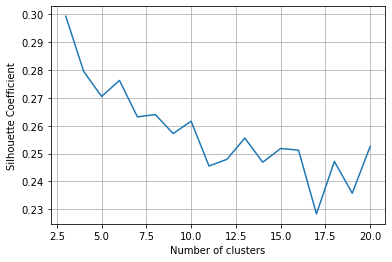

In [60]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

***Note***

***The solution can be 5 based on the SC score. If we take highest SC score, 6 segment solution is best.***

# Segment Distribution

In [61]:
telco.cluster_6.value_counts()/sum(telco.cluster_6.value_counts())

0    0.205
2    0.188
5    0.185
4    0.173
1    0.160
3    0.089
Name: cluster_6, dtype: float64

# Elbow Analysis 

**Method to understand how much variance is explained by increase of each cluster.**

In [62]:
cluster_range = range( 2, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters ).fit( dimensions )
    cluster_errors.append( clusters.inertia_)

In [63]:
clusters_df = pd.DataFrame( { "num_clusters": cluster_range, "cluster_errors": cluster_errors } )
clusters_df.head(5)

,num_clusters,cluster_errors
0,2,10721.541706
1,3,8323.398953
2,4,7033.717953
3,5,6189.685370
4,6,5536.817948


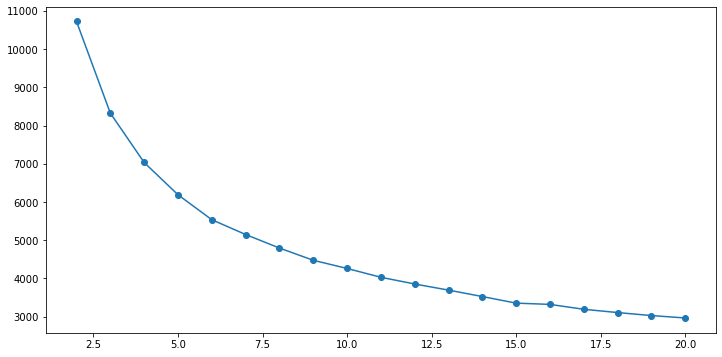

In [64]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

*** Note:***
    
**- The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5. So, optimal number of clusters could either 4 or 5.***

***- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.***

# Qualitative Analysis : Profiling

In [65]:
telco.shape[0]

1000

In [66]:
telco.cluster_3.value_counts()

0    485
2    296
1    219
Name: cluster_3, dtype: int64

In [67]:
telco.cluster_3.value_counts() / telco.shape[0]

0    0.485
2    0.296
1    0.219
Name: cluster_3, dtype: float64

In [68]:
telco.cluster_3.value_counts() * 100 / sum(telco.cluster_3.value_counts())

0    48.5
2    29.6
1    21.9
Name: cluster_3, dtype: float64

In [69]:
size = pd.concat( [pd.Series( telco.shape[0] ), 
                   pd.Series.sort_index(telco.cluster_3.value_counts()), 
                   pd.Series.sort_index(telco.cluster_4.value_counts()),
                   pd.Series.sort_index(telco.cluster_5.value_counts()), 
                   pd.Series.sort_index(telco.cluster_6.value_counts()),
                   pd.Series.sort_index(telco.cluster_7.value_counts()), 
                   pd.Series.sort_index(telco.cluster_8.value_counts()),
                   pd.Series.sort_index(telco.cluster_9.value_counts()), 
                   pd.Series.sort_index(telco.cluster_10.value_counts())
                  ]
                )

In [70]:
size.head(5)

0    1000
0     485
1     219
2     296
0     272
dtype: int64

In [71]:
Segment_size = pd.DataFrame(size, columns = ['Segment_size'])
Segment_Pct = pd.DataFrame(size / telco.shape[0], columns = ['Segment_Pct'])

In [72]:
Segment_Pct.T

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,9
Segment_Pct,1.0,0.485,0.219,0.296,0.272,0.316,0.215,0.197,0.177,0.244,0.198,0.216,0.165,0.205,0.16,0.188,0.089,0.173,0.185,0.088,0.172,0.151,0.073,0.167,0.184,0.165,0.165,0.133,0.142,0.165,0.084,0.084,0.153,0.074,0.073,0.166,0.107,0.073,0.09,0.149,0.132,0.134,0.076,0.079,0.069,0.103,0.176,0.081,0.12,0.14,0.076,0.131,0.025


In [73]:
Segment_size.T

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,9
Segment_size,1000,485,219,296,272,316,215,197,177,244,198,216,165,205,160,188,89,173,185,88,172,151,73,167,184,165,165,133,142,165,84,84,153,74,73,166,107,73,90,149,132,134,76,79,69,103,176,81,120,140,76,131,25


In [74]:
pd.concat( [Segment_size.T, Segment_Pct.T], axis = 0)

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,9
Segment_size,1000.0,485.000,219.000,296.000,272.000,316.000,215.000,197.000,177.000,244.000,198.000,216.000,165.000,205.000,160.00,188.000,89.000,173.000,185.000,88.000,172.000,151.000,73.000,167.000,184.000,165.000,165.000,133.000,142.000,165.000,84.000,84.000,153.000,74.000,73.000,166.000,107.000,73.000,90.00,149.000,132.000,134.000,76.000,79.000,69.000,103.000,176.000,81.000,120.00,140.00,76.000,131.000,25.000
Segment_Pct,1.0,0.485,0.219,0.296,0.272,0.316,0.215,0.197,0.177,0.244,0.198,0.216,0.165,0.205,0.16,0.188,0.089,0.173,0.185,0.088,0.172,0.151,0.073,0.167,0.184,0.165,0.165,0.133,0.142,0.165,0.084,0.084,0.153,0.074,0.073,0.166,0.107,0.073,0.09,0.149,0.132,0.134,0.076,0.079,0.069,0.103,0.176,0.081,0.12,0.14,0.076,0.131,0.025


In [75]:
# Mean value gives a good indication of the distribution of data. 
# So we are finding mean value for each variable for each cluster
Profiling_output = pd.concat([telco.apply(lambda x: x.mean()).T, 
                             telco.groupby('cluster_3').apply(lambda x: x.mean()).T, 
                             telco.groupby('cluster_4').apply(lambda x: x.mean()).T,
                             telco.groupby('cluster_5').apply(lambda x: x.mean()).T, 
                             telco.groupby('cluster_6').apply(lambda x: x.mean()).T,
                             telco.groupby('cluster_7').apply(lambda x: x.mean()).T, 
                             telco.groupby('cluster_8').apply(lambda x: x.mean()).T,
                             telco.groupby('cluster_9').apply(lambda x: x.mean()).T,
                             telco.groupby('cluster_10').apply(lambda x: x.mean()).T], axis = 1)

In [76]:
Profiling_output.T.head(10)

,tenure,age,income,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
0,35.526000,41.645100,73.785700,0.474000,0.386000,0.678000,0.296000,0.475000,0.304000,0.261000,0.368000,0.481000,0.485000,0.493000,0.502000,11.559125,13.067400,14.167100,13.629250,11.403075,0.371000,0.811000,1.337000,1.948000,2.420000,3.271000,3.104000,4.042000,4.372000
0,31.527835,39.563010,55.946309,0.086598,0.360825,0.443299,0.039175,0.426804,0.086598,0.051546,0.334021,0.119588,0.117526,0.127835,0.140206,9.680000,1.535082,10.542577,8.090722,0.864536,0.373196,0.000000,1.674227,2.274227,2.358763,2.878351,2.783505,4.144330,4.511340
1,34.383562,40.004566,83.077397,0.803653,0.890411,0.872146,0.963470,0.707763,0.849315,0.817352,0.803653,0.817352,0.794521,0.849315,0.831050,10.987226,22.420228,38.841096,18.257991,39.749201,0.767123,1.000000,2.004566,1.858447,4.657534,3.223744,1.118721,3.949772,3.726027
2,42.922297,46.270405,96.141182,0.864865,0.054054,0.918919,0.222973,0.381757,0.256757,0.192568,0.101351,0.824324,0.858108,0.827703,0.851351,15.061225,25.043429,1.850507,19.279561,7.698311,0.074324,2.000000,0.290541,1.479730,0.864865,3.949324,5.097973,3.942568,4.621622
0,39.981618,45.400809,92.273199,0.897059,0.040441,0.911765,0.242647,0.327206,0.272059,0.202206,0.106618,0.882353,0.900735,0.867647,0.867647,13.487574,25.998548,1.373346,18.186581,8.207721,0.069853,1.963235,0.000000,1.250000,0.827206,4.136029,5.341912,3.863971,4.522059
1,20.405063,35.579146,47.202405,0.110759,0.430380,0.142405,0.047468,0.338608,0.094937,0.063291,0.379747,0.142405,0.142405,0.142405,0.161392,6.247310,1.935965,12.109177,1.654272,1.050316,0.439873,0.006329,1.000000,1.708861,2.841772,3.291139,2.768987,3.667722,3.699367
2,34.265116,39.841860,81.730047,0.813953,0.883721,0.879070,0.972093,0.706977,0.855814,0.832558,0.800000,0.837209,0.804651,0.851163,0.841860,10.848302,22.921070,38.621163,18.347674,40.314535,0.767442,1.004651,2.000000,1.860465,4.683721,3.246512,1.051163,3.934884,3.711628
3,55.005076,48.157716,82.230812,0.101523,0.248731,0.994924,0.030457,0.644670,0.081218,0.035533,0.238579,0.081218,0.111675,0.147208,0.172589,18.192741,2.314721,8.444162,21.395939,0.868274,0.243655,0.299492,3.000000,3.390863,1.472081,2.071066,2.791878,5.005076,5.964467
0,25.994350,36.994350,54.819153,0.107345,0.937853,0.327684,0.152542,0.638418,0.231638,0.135593,0.779661,0.112994,0.135593,0.146893,0.152542,7.641243,1.710452,28.329661,4.761299,4.093503,0.796610,0.101695,1.372881,0.000000,3.966102,1.107345,3.355932,5.621469,3.785311
1,41.163934,46.036967,97.243074,0.934426,0.045082,0.946721,0.282787,0.344262,0.299180,0.233607,0.106557,0.905738,0.934426,0.901639,0.913934,13.820297,27.933832,1.543033,18.948770,9.786885,0.077869,1.987705,0.032787,1.000000,0.918033,3.897541,5.274590,3.676230,4.295082


In [77]:
Profiling_output_final = pd.concat( [Segment_size.T, Segment_Pct.T, Profiling_output], axis = 0 ).round(2)
Profiling_output_final

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,9
Segment_size,1000.00,485.00,219.00,296.00,272.00,316.00,215.00,197.00,177.00,244.00,198.00,216.00,165.00,205.00,160.00,188.00,89.00,173.00,185.00,88.00,172.00,151.00,73.00,167.00,184.00,165.00,165.00,133.00,142.00,165.00,84.00,84.00,153.00,74.00,73.00,166.00,107.00,73.00,90.00,149.00,132.00,134.00,76.00,79.00,69.00,103.00,176.00,81.00,120.00,140.00,76.00,131.00,25.00
Segment_Pct,1.00,0.48,0.22,0.30,0.27,0.32,0.22,0.20,0.18,0.24,0.20,0.22,0.16,0.20,0.16,0.19,0.09,0.17,0.18,0.09,0.17,0.15,0.07,0.17,0.18,0.16,0.16,0.13,0.14,0.16,0.08,0.08,0.15,0.07,0.07,0.17,0.11,0.07,0.09,0.15,0.13,0.13,0.08,0.08,0.07,0.10,0.18,0.08,0.12,0.14,0.08,0.13,0.02
tenure,35.53,31.53,34.38,42.92,39.98,20.41,34.27,55.01,25.99,41.16,34.38,21.60,57.02,31.11,56.89,21.42,61.10,26.16,32.74,32.07,25.94,55.77,64.68,33.76,21.12,33.78,33.53,54.31,16.97,22.02,33.61,63.71,31.06,51.36,36.26,21.99,19.90,51.73,63.00,28.89,54.58,17.55,49.88,33.10,51.51,20.98,20.78,64.26,18.93,28.35,49.37,53.90,51.20
age,41.65,39.56,40.00,46.27,45.40,35.58,39.84,48.16,36.99,46.04,39.97,36.22,49.24,41.48,49.14,36.21,54.39,36.92,39.16,40.43,36.95,48.62,57.04,39.62,36.25,42.05,39.70,49.08,34.95,36.18,41.32,54.99,41.46,43.27,42.18,36.30,33.33,43.34,54.69,40.53,49.02,35.30,48.01,40.53,43.32,32.89,36.05,53.42,35.66,40.49,47.43,48.99,56.96
income,73.79,55.95,83.08,96.14,92.27,47.20,81.73,82.23,54.82,97.24,82.68,46.91,83.95,63.37,81.18,47.07,167.41,54.49,79.08,75.73,54.53,73.14,202.05,80.99,46.26,60.07,81.65,75.11,50.51,45.32,82.98,176.39,57.79,68.18,90.10,46.83,56.47,68.34,164.38,54.67,73.43,51.22,117.18,70.57,62.77,54.70,45.05,107.72,53.52,55.80,100.93,75.64,391.09
tollfree,0.47,0.09,0.80,0.86,0.90,0.11,0.81,0.10,0.11,0.93,0.86,0.16,0.14,0.88,0.13,0.09,0.94,0.10,0.84,0.91,0.10,0.09,0.89,0.83,0.08,0.87,0.85,0.06,0.11,0.10,0.93,0.92,0.86,0.09,0.95,0.10,0.75,0.10,0.90,0.87,0.06,0.10,0.92,0.92,0.10,0.73,0.08,0.91,0.11,0.86,0.92,0.05,0.80
equip,0.39,0.36,0.89,0.05,0.04,0.43,0.88,0.25,0.94,0.05,0.89,0.05,0.13,0.08,0.13,0.05,0.09,0.94,0.91,0.10,0.94,0.12,0.12,1.00,0.05,0.08,1.00,0.00,0.89,0.00,0.10,0.12,0.06,0.91,0.05,0.00,0.99,0.90,0.08,0.06,0.00,0.89,0.99,0.06,0.90,1.00,0.05,0.07,0.92,0.07,0.96,0.00,0.32
callcard,0.68,0.44,0.87,0.92,0.91,0.14,0.88,0.99,0.33,0.95,0.89,0.22,1.00,0.87,1.00,0.16,0.98,0.34,0.88,0.98,0.33,1.00,0.97,0.86,0.15,0.85,0.86,1.00,0.08,0.15,0.98,0.96,0.86,0.97,0.97,0.15,0.78,0.97,0.97,0.86,1.00,0.04,0.99,0.97,0.99,0.78,0.13,0.99,0.04,0.84,0.99,1.00,0.88
wireless,0.30,0.04,0.96,0.22,0.24,0.05,0.97,0.03,0.15,0.28,0.98,0.01,0.02,0.18,0.02,0.01,0.54,0.14,0.98,0.91,0.14,0.02,0.29,0.98,0.01,0.02,0.98,0.00,0.10,0.01,0.94,0.21,0.03,0.23,0.96,0.01,0.92,0.22,0.14,0.07,0.00,0.08,1.00,0.91,0.19,0.91,0.01,0.12,0.10,0.03,1.00,0.00,0.52
multline,0.48,0.43,0.71,0.38,0.33,0.34,0.71,0.64,0.64,0.34,0.70,0.14,0.66,0.17,0.65,0.15,0.79,0.63,0.69,0.41,0.63,0.62,0.81,0.74,0.15,0.17,0.73,0.54,0.49,0.18,0.44,0.81,0.10,0.86,0.52,0.17,0.52,0.88,0.71,0.09,0.55,0.50,0.93,0.43,0.87,0.55,0.16,0.77,0.57,0.09,0.95,0.53,0.48


In [78]:
#Profiling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profiling_output_final.columns = ['Overall', 
                    'KM3_1', 'KM3_2', 'KM3_3',
                    'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                    'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                    'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                    'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                    'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',
                'KM9_1', 'KM9_2', 'KM9_3', 'KM9_4', 'KM9_5','KM9_6','KM9_7','KM9_8', 'KM9_9',
    'KM10_1', 'KM10_2', 'KM10_3', 'KM10_4', 'KM10_5','KM10_6','KM10_7','KM10_8','KM10_9','KM10_10']

In [79]:
Profiling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,KM5_3,KM5_4,KM5_5,KM6_1,KM6_2,KM6_3,KM6_4,KM6_5,KM6_6,KM7_1,KM7_2,KM7_3,KM7_4,KM7_5,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8,KM9_1,KM9_2,KM9_3,KM9_4,KM9_5,KM9_6,KM9_7,KM9_8,KM9_9,KM10_1,KM10_2,KM10_3,KM10_4,KM10_5,KM10_6,KM10_7,KM10_8,KM10_9,KM10_10
Segment_size,1000.00,485.00,219.00,296.00,272.00,316.00,215.00,197.00,177.00,244.00,198.00,216.00,165.00,205.00,160.00,188.00,89.00,173.00,185.00,88.00,172.00,151.00,73.00,167.00,184.00,165.00,165.00,133.00,142.00,165.00,84.00,84.00,153.00,74.00,73.00,166.00,107.00,73.00,90.00,149.00,132.00,134.00,76.00,79.00,69.00,103.00,176.00,81.00,120.00,140.00,76.00,131.00,25.00
Segment_Pct,1.00,0.48,0.22,0.30,0.27,0.32,0.22,0.20,0.18,0.24,0.20,0.22,0.16,0.20,0.16,0.19,0.09,0.17,0.18,0.09,0.17,0.15,0.07,0.17,0.18,0.16,0.16,0.13,0.14,0.16,0.08,0.08,0.15,0.07,0.07,0.17,0.11,0.07,0.09,0.15,0.13,0.13,0.08,0.08,0.07,0.10,0.18,0.08,0.12,0.14,0.08,0.13,0.02
tenure,35.53,31.53,34.38,42.92,39.98,20.41,34.27,55.01,25.99,41.16,34.38,21.60,57.02,31.11,56.89,21.42,61.10,26.16,32.74,32.07,25.94,55.77,64.68,33.76,21.12,33.78,33.53,54.31,16.97,22.02,33.61,63.71,31.06,51.36,36.26,21.99,19.90,51.73,63.00,28.89,54.58,17.55,49.88,33.10,51.51,20.98,20.78,64.26,18.93,28.35,49.37,53.90,51.20
age,41.65,39.56,40.00,46.27,45.40,35.58,39.84,48.16,36.99,46.04,39.97,36.22,49.24,41.48,49.14,36.21,54.39,36.92,39.16,40.43,36.95,48.62,57.04,39.62,36.25,42.05,39.70,49.08,34.95,36.18,41.32,54.99,41.46,43.27,42.18,36.30,33.33,43.34,54.69,40.53,49.02,35.30,48.01,40.53,43.32,32.89,36.05,53.42,35.66,40.49,47.43,48.99,56.96
income,73.79,55.95,83.08,96.14,92.27,47.20,81.73,82.23,54.82,97.24,82.68,46.91,83.95,63.37,81.18,47.07,167.41,54.49,79.08,75.73,54.53,73.14,202.05,80.99,46.26,60.07,81.65,75.11,50.51,45.32,82.98,176.39,57.79,68.18,90.10,46.83,56.47,68.34,164.38,54.67,73.43,51.22,117.18,70.57,62.77,54.70,45.05,107.72,53.52,55.80,100.93,75.64,391.09
tollfree,0.47,0.09,0.80,0.86,0.90,0.11,0.81,0.10,0.11,0.93,0.86,0.16,0.14,0.88,0.13,0.09,0.94,0.10,0.84,0.91,0.10,0.09,0.89,0.83,0.08,0.87,0.85,0.06,0.11,0.10,0.93,0.92,0.86,0.09,0.95,0.10,0.75,0.10,0.90,0.87,0.06,0.10,0.92,0.92,0.10,0.73,0.08,0.91,0.11,0.86,0.92,0.05,0.80
equip,0.39,0.36,0.89,0.05,0.04,0.43,0.88,0.25,0.94,0.05,0.89,0.05,0.13,0.08,0.13,0.05,0.09,0.94,0.91,0.10,0.94,0.12,0.12,1.00,0.05,0.08,1.00,0.00,0.89,0.00,0.10,0.12,0.06,0.91,0.05,0.00,0.99,0.90,0.08,0.06,0.00,0.89,0.99,0.06,0.90,1.00,0.05,0.07,0.92,0.07,0.96,0.00,0.32
callcard,0.68,0.44,0.87,0.92,0.91,0.14,0.88,0.99,0.33,0.95,0.89,0.22,1.00,0.87,1.00,0.16,0.98,0.34,0.88,0.98,0.33,1.00,0.97,0.86,0.15,0.85,0.86,1.00,0.08,0.15,0.98,0.96,0.86,0.97,0.97,0.15,0.78,0.97,0.97,0.86,1.00,0.04,0.99,0.97,0.99,0.78,0.13,0.99,0.04,0.84,0.99,1.00,0.88
wireless,0.30,0.04,0.96,0.22,0.24,0.05,0.97,0.03,0.15,0.28,0.98,0.01,0.02,0.18,0.02,0.01,0.54,0.14,0.98,0.91,0.14,0.02,0.29,0.98,0.01,0.02,0.98,0.00,0.10,0.01,0.94,0.21,0.03,0.23,0.96,0.01,0.92,0.22,0.14,0.07,0.00,0.08,1.00,0.91,0.19,0.91,0.01,0.12,0.10,0.03,1.00,0.00,0.52
multline,0.48,0.43,0.71,0.38,0.33,0.34,0.71,0.64,0.64,0.34,0.70,0.14,0.66,0.17,0.65,0.15,0.79,0.63,0.69,0.41,0.63,0.62,0.81,0.74,0.15,0.17,0.73,0.54,0.49,0.18,0.44,0.81,0.10,0.86,0.52,0.17,0.52,0.88,0.71,0.09,0.55,0.50,0.93,0.43,0.87,0.55,0.16,0.77,0.57,0.09,0.95,0.53,0.48


In [80]:
Profiling_output_final.to_excel('Profiling_output.xlsx')

# Assigning segments to new data (Predicting segment for new data)

In [81]:
#You can apply same formulations and operations on the new data and predict the outputs with the different number of clusters.
# Final prediction with 5 clusters: 
# km_5.predict(dimensions_new_data)
#new_cust['predicted_segment'] = pd.Series(km_5.predict( dimensions_new_data ))